In [1]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd


In [2]:
linear, lstm_model, dnn_model, df_all_chan,input_columns  = d2d.import_data()

da = df_all_chan.to_numpy()

# chan_mean = da[:,0:2495].flatten().mean()
# chan_std = da[:,0:2495].flatten().std()
# discharge_mean = da[:,2496].flatten().mean()
# discharge_std = da[:,2496].flatten().std()

# da[:,0:2495] = (da[:,0:2495] - chan_mean) / chan_std
# da[:,2496] = (da[:,2496] - discharge_mean) / discharge_std
df_all_chan

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


,0,1,2,3,4,5,6,7,8,9,...,2487,2488,2489,2490,2491,2492,2493,2494,2495,Discharge
0,1737.318436,1932.321258,1788.269101,3706.977556,1831.756626,1768.674227,1908.850695,3690.341997,1804.145150,2437.436803,...,3603.932847,2066.070800,2215.669390,1881.772352,3990.883595,1584.965970,1787.281257,1862.912440,4160.545583,9.947179
1,8161.349279,8245.783723,8118.189935,528.834231,468.890511,714.714310,728.051775,158.440806,82.719811,116.949415,...,8238.452283,8204.901437,8194.671705,8228.769841,8211.066134,8229.370787,8218.436955,8210.143402,8178.032001,9.934657
2,8242.942236,8205.640252,8093.980026,510.832905,451.884623,709.510655,709.932307,153.715844,83.404382,116.112236,...,8184.500407,8221.490571,8202.429647,8194.927561,8197.675324,8188.718827,8189.658071,8225.017259,8163.918322,9.929290
3,8159.780047,8196.654224,8113.873839,489.734947,438.657688,690.418208,701.896139,158.058233,83.003254,112.787627,...,8173.860868,8156.187127,8151.113841,8235.843141,8145.360321,8192.392266,8169.275389,8129.926491,8161.652382,9.923923
4,8198.498465,8161.470921,8120.452338,521.425978,444.272741,689.710217,695.164917,160.246640,84.054029,111.125592,...,8198.827286,8234.815465,8219.987333,8140.961605,8193.517740,8157.154485,8241.648596,8229.194191,8234.212679,9.918557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62740,8250.132344,8239.956853,8120.606117,709.708516,524.745767,837.184738,489.648388,74.456188,99.460249,91.911794,...,8237.995892,8243.180597,8263.685370,8236.631204,8275.920631,8158.055021,8254.067590,8260.170060,8189.577468,9.264333
62741,8305.046581,8215.717055,8123.947165,713.983575,522.460494,877.141941,504.369225,73.276914,98.030764,95.958327,...,8244.600296,8220.651129,8233.808688,8202.925678,8272.382131,8208.732997,8185.700921,8199.439315,8194.036074,9.263708
62742,8233.246034,8212.890322,8126.486773,712.414299,520.468924,892.210041,495.762205,72.542053,97.112611,98.886336,...,8296.184469,8233.850012,8214.919239,8173.153815,8231.181168,8183.252249,8171.110881,8196.319138,8220.779280,9.263083
62743,8230.088927,8237.590610,8188.620285,705.487651,523.552127,904.283215,506.508453,72.315307,96.342666,101.163440,...,8232.138229,8214.366628,8275.731039,8266.643805,8154.573206,8208.317212,8251.329151,8267.316168,8207.721162,9.262458


In [3]:
# test_data_frame = pd.DataFrame({'0':range(0,10000), 'Discharge':range(0,10000)})
# input_columns = ['0']

In [4]:
# print('Number of DAS observations: %d'%df_all_chan.shape[0])
# window_input_width = 200
# print('Number of tf Dataset windows: %d'%np.floor(df_all_chan.shape[0]/window_input_width))

In [5]:


# multi_step_window = d2d.WindowGenerator(test_data_frame,
#     input_width=window_input_width, label_width=1, shift=0,
#     label_columns=['Discharge'],
#     input_columns=input_columns,
#     shuffle=False)
window_input_width = 200
multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=True)

(array([[[-3.54133636e-01,  2.26923034e-01,  1.14726432e-01, ...,
         -1.60057759e+00, -2.55366230e+00, -2.21347380e+00],
        [-1.03894234e+00,  4.55386102e-01, -1.00408375e-01, ...,
         -9.40444946e-01, -2.77585196e+00, -2.30307555e+00],
        [-9.81271490e-02, -1.14181280e+00,  1.28855813e+00, ...,
          4.02015857e-02, -2.83119416e+00, -2.34134126e+00],
        ...,
        [-1.86135876e+00, -2.40507603e+00, -2.17826024e-01, ...,
         -6.04875863e-01,  1.36350071e+00,  1.22449875e+00],
        [-1.32005513e+00, -2.59902692e+00, -1.84142673e+00, ...,
         -3.17226619e-01,  1.09211433e+00,  7.72611558e-01],
        [-1.17455554e+00,  6.49604350e-02,  3.60154241e-01, ...,
         -1.88722253e-01,  2.35443926e+00,  1.88257718e+00]],

       [[ 1.09834760e-01, -7.18906894e-02, -1.51972532e+00, ...,
          1.29976690e+00,  3.46347785e+00,  3.30941439e+00],
        [ 8.41040254e-01,  1.55117905e+00, -8.61516118e-01, ...,
          1.18697906e+00,  3.10104275

In [6]:
ex_inputs,ex_labels = next(iter(multi_step_window_shuffled.train))
print(ex_inputs.numpy().shape)
print(ex_labels.numpy().shape)

(64, 200, 2308)
(64, 1, 1)


In [7]:
history_linear = d2d.compile_and_fit(linear, multi_step_window_shuffled, learning_rate = 0.001)

Epoch 1/100
3/3 [==============================] - 1s 194ms/step - loss: 60666.0508 - mean_absolute_error: 134.5173 - val_loss: 73435.6328 - val_mean_absolute_error: 187.5965
Epoch 2/100
3/3 [==============================] - 0s 167ms/step - loss: 70110.6719 - mean_absolute_error: 196.0550 - val_loss: 42571.8047 - val_mean_absolute_error: 72.8303
Epoch 3/100
3/3 [==============================] - 0s 165ms/step - loss: 64690.6055 - mean_absolute_error: 130.2858 - val_loss: 50140.3320 - val_mean_absolute_error: 129.1171
Epoch 4/100
3/3 [==============================] - 0s 168ms/step - loss: 14634.6641 - mean_absolute_error: 75.4348 - val_loss: 67206.6328 - val_mean_absolute_error: 147.6009
Epoch 5/100
3/3 [==============================] - 0s 163ms/step - loss: 37723.6211 - mean_absolute_error: 123.1295 - val_loss: 16525.0605 - val_mean_absolute_error: 68.0925
Epoch 6/100
3/3 [==============================] - 0s 161ms/step - loss: 13160.9951 - mean_absolute_error: 63.5260 - val_loss: 2

In [8]:
history = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

Epoch 1/100
3/3 [==============================] - 2s 526ms/step - loss: 3.7898 - mean_absolute_error: 1.5755 - val_loss: 1.3343 - val_mean_absolute_error: 0.8607
Epoch 2/100
3/3 [==============================] - 1s 418ms/step - loss: 0.8481 - mean_absolute_error: 0.6963 - val_loss: 0.7378 - val_mean_absolute_error: 0.6398
Epoch 3/100
3/3 [==============================] - 1s 434ms/step - loss: 0.4203 - mean_absolute_error: 0.4801 - val_loss: 0.4623 - val_mean_absolute_error: 0.5452
Epoch 4/100
3/3 [==============================] - 1s 471ms/step - loss: 0.3155 - mean_absolute_error: 0.4388 - val_loss: 0.3768 - val_mean_absolute_error: 0.4847
Epoch 5/100
3/3 [==============================] - 1s 488ms/step - loss: 0.2472 - mean_absolute_error: 0.3761 - val_loss: 0.3488 - val_mean_absolute_error: 0.4735
Epoch 6/100
3/3 [==============================] - 1s 469ms/step - loss: 0.2040 - mean_absolute_error: 0.3246 - val_loss: 0.3270 - val_mean_absolute_error: 0.4426
Epoch 7/100
3/3 [=====

In [9]:
history_dnn = d2d.compile_and_fit(dnn_model, multi_step_window_shuffled, learning_rate = 0.001)

Epoch 1/100
3/3 [==============================] - 1s 247ms/step - loss: 73.7499 - mean_absolute_error: 5.4681 - val_loss: 55.6140 - val_mean_absolute_error: 5.9718
Epoch 2/100
3/3 [==============================] - 0s 192ms/step - loss: 65.7189 - mean_absolute_error: 6.8586 - val_loss: 13.0193 - val_mean_absolute_error: 2.9721
Epoch 3/100
3/3 [==============================] - 0s 193ms/step - loss: 22.8221 - mean_absolute_error: 3.0332 - val_loss: 17.1247 - val_mean_absolute_error: 2.7188
Epoch 4/100
3/3 [==============================] - 0s 192ms/step - loss: 12.9521 - mean_absolute_error: 2.5812 - val_loss: 5.6589 - val_mean_absolute_error: 1.7073
Epoch 5/100
3/3 [==============================] - 0s 194ms/step - loss: 4.6707 - mean_absolute_error: 1.6817 - val_loss: 5.5274 - val_mean_absolute_error: 1.8157
Epoch 6/100
3/3 [==============================] - 0s 189ms/step - loss: 5.1530 - mean_absolute_error: 1.8296 - val_loss: 2.8740 - val_mean_absolute_error: 1.3468
Epoch 7/100
3/3

In [10]:
val_performance = lstm_model.evaluate(multi_step_window_shuffled.val)
performance = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


1/1 [==============================] - 0s 254ms/step - loss: 0.3400 - mean_absolute_error: 0.4303


In [11]:
val_performance_linear = linear.evaluate(multi_step_window_shuffled.val)
performance_linear = linear.evaluate(multi_step_window_shuffled.test, verbose=0)


1/1 [==============================] - 0s 208ms/step - loss: 115.0372 - mean_absolute_error: 5.3663


In [12]:
val_performance_dnn = dnn_model.evaluate(multi_step_window_shuffled.val)
performance_dnn = dnn_model.evaluate(multi_step_window_shuffled.test, verbose=0)

1/1 [==============================] - 0s 208ms/step - loss: 1.4336 - mean_absolute_error: 0.8609


In [33]:
performance_dnn
dnn_model.metrics_names

['loss', 'mean_absolute_error']

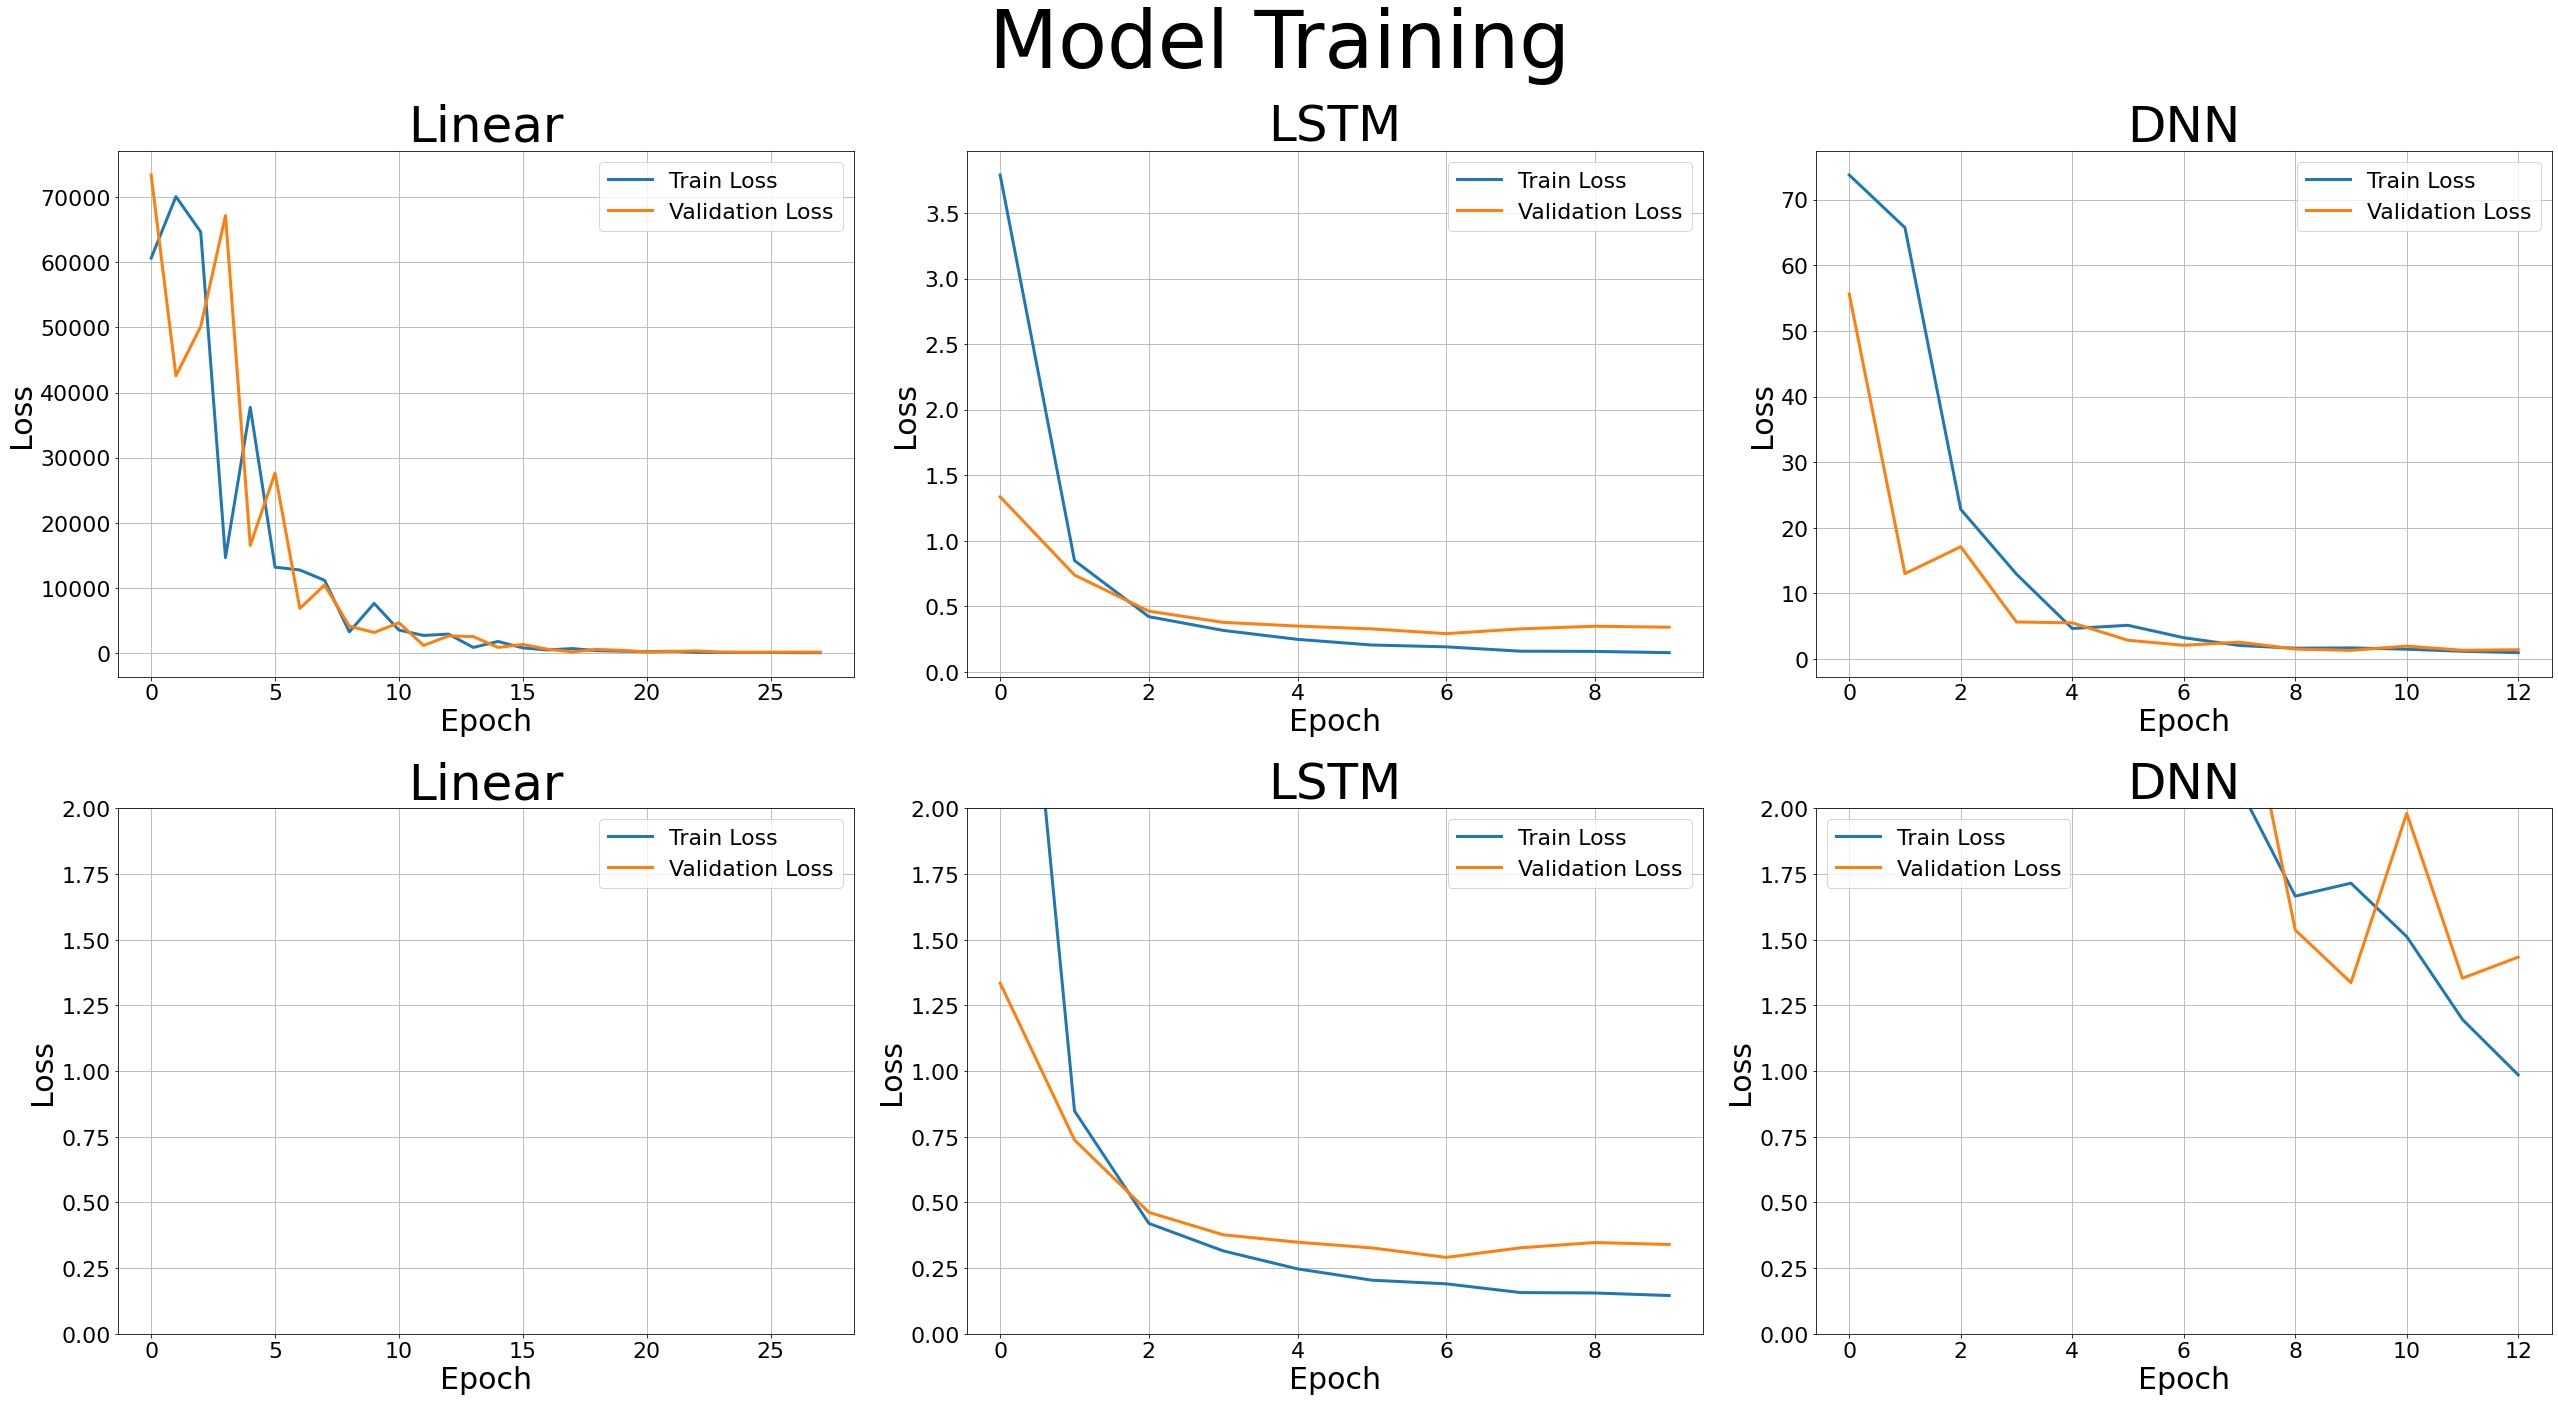

In [61]:
import matplotlib

matplotlib.rcParams.update({'font.size': 22})

fig, ((ax0, ax1, ax2), (ax3,ax4,ax5)) = plt.subplots(nrows=2, 
                                                     ncols=3, 
                                                     sharey=False, 
                                                     sharex=False,
                                                     figsize=(36,20))
fig.patch.set_facecolor('white')

for ax,hist,title in zip((ax0,ax1,ax2),(history_linear,history,history_dnn),
                   ('Linear','LSTM','DNN')):
    ax.plot(hist.history['loss'], label='Train Loss',linewidth=3)
    ax.plot(hist.history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    
for ax,hist,title in zip((ax3,ax4,ax5),(history_linear,history,history_dnn),
                   ('Linear','LSTM','DNN')):
    ax.plot(hist.history['loss'], label='Train Loss',linewidth=3)
    ax.plot(hist.history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim([0,2])

fig.suptitle('Model Training', fontsize = 80)

plt.tight_layout()
plt.show()

In [18]:
multi_step_window_shuffled.test

<TensorSliceDataset shapes: ((57, 200, 2308), (57, 1, 1)), types: (tf.float32, tf.float32)>

# Compare the relative performance of the different models

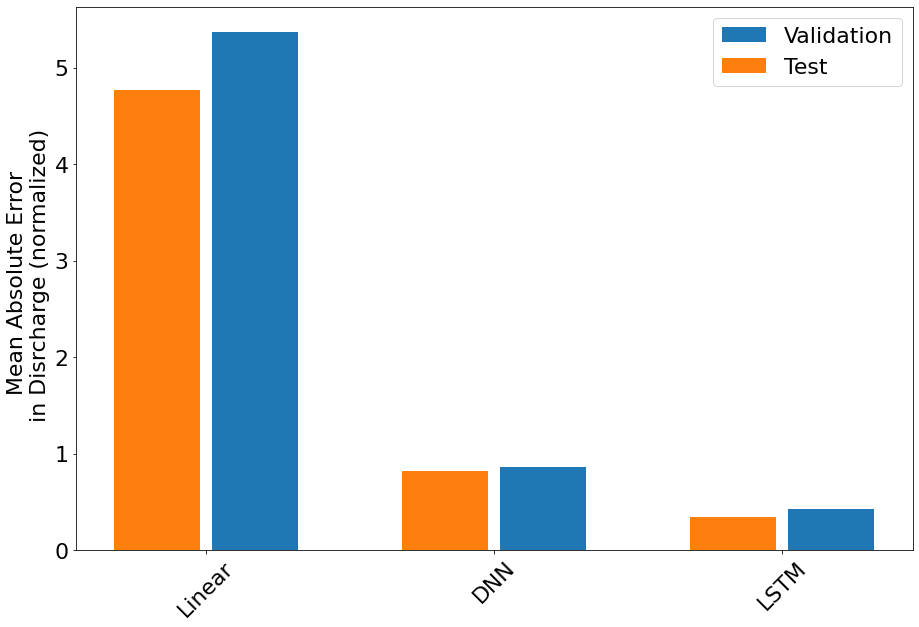

In [58]:
x = np.arange(3)
width = 0.3

fig,ax = plt.subplots(figsize=(15,10))
fig.patch.set_facecolor('white')
val_perfs = [ val_performance_linear[1], val_performance_dnn[1], val_performance[1]]
test_perfs = [ performance_linear[1], performance_dnn[1], performance[1]]

plt.bar(x + 0.17, val_perfs, width, label='Validation')
plt.bar(x - 0.17, test_perfs, width, label='Test')

plt.ylabel('Mean Absolute Error \n in Disrcharge (normalized)')

plt.xticks(ticks=x, labels=('Linear','DNN','LSTM') ,rotation=45)
_ = plt.legend()


In [62]:
test_inputs = []
for element in multi_step_window_shuffled.test.as_numpy_iterator():
    test_inputs.append(element[0])

In [63]:
test_inputs = np.asarray(test_inputs)

In [64]:
test_inputs = test_inputs.squeeze()


In [65]:
test_inputs.shape

(57, 200, 2308)

In [66]:
predictions_lstm = lstm_model.predict(test_inputs)
predictions_linear = linear.predict(test_inputs)
predictions_dnn = dnn_model.predict(test_inputs)

In [67]:
print(predictions_lstm.shape)
print(predictions_linear.shape)
print(predictions_dnn.shape)

(57, 1)
(57, 1)
(57, 1)


In [68]:
test_set = []
for element in multi_step_window_shuffled.test.as_numpy_iterator():
    test_set.append(element[1])

In [69]:
test_set = np.asarray(test_set)

In [70]:
test_set = test_set.squeeze()

Text(0, 0.5, 'Observed Discharge')

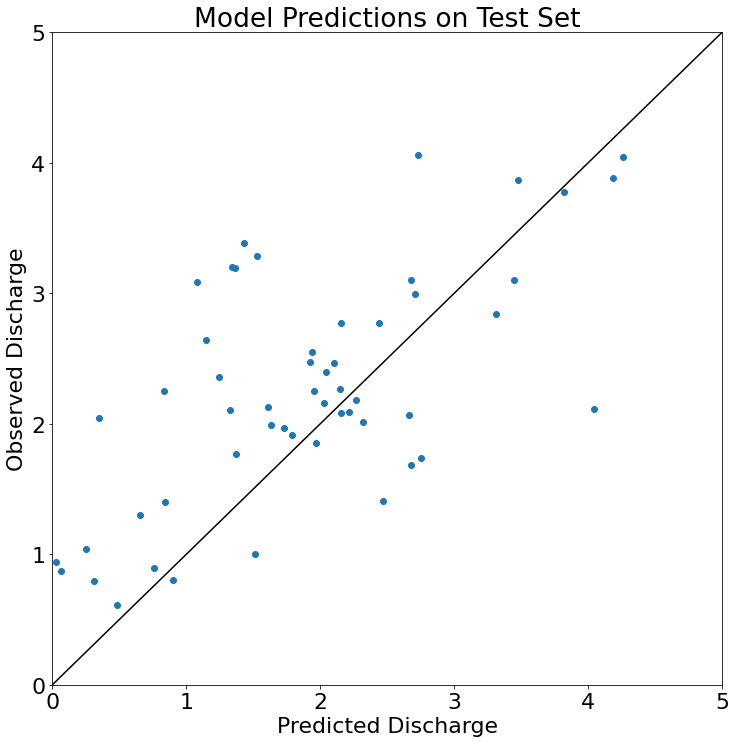

In [71]:

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize = (12,12))
plt.title('Model Predictions on Test Set', )
plt.scatter(predictions_dnn, test_set)
plt.ylim([0,5])
plt.xlim([0,5])
plt.plot([0,5],[0,5], c='black')
plt.xlabel('Predicted Discharge')
plt.ylabel('Observed Discharge')


Text(0, 0.5, 'Observed Discharge')

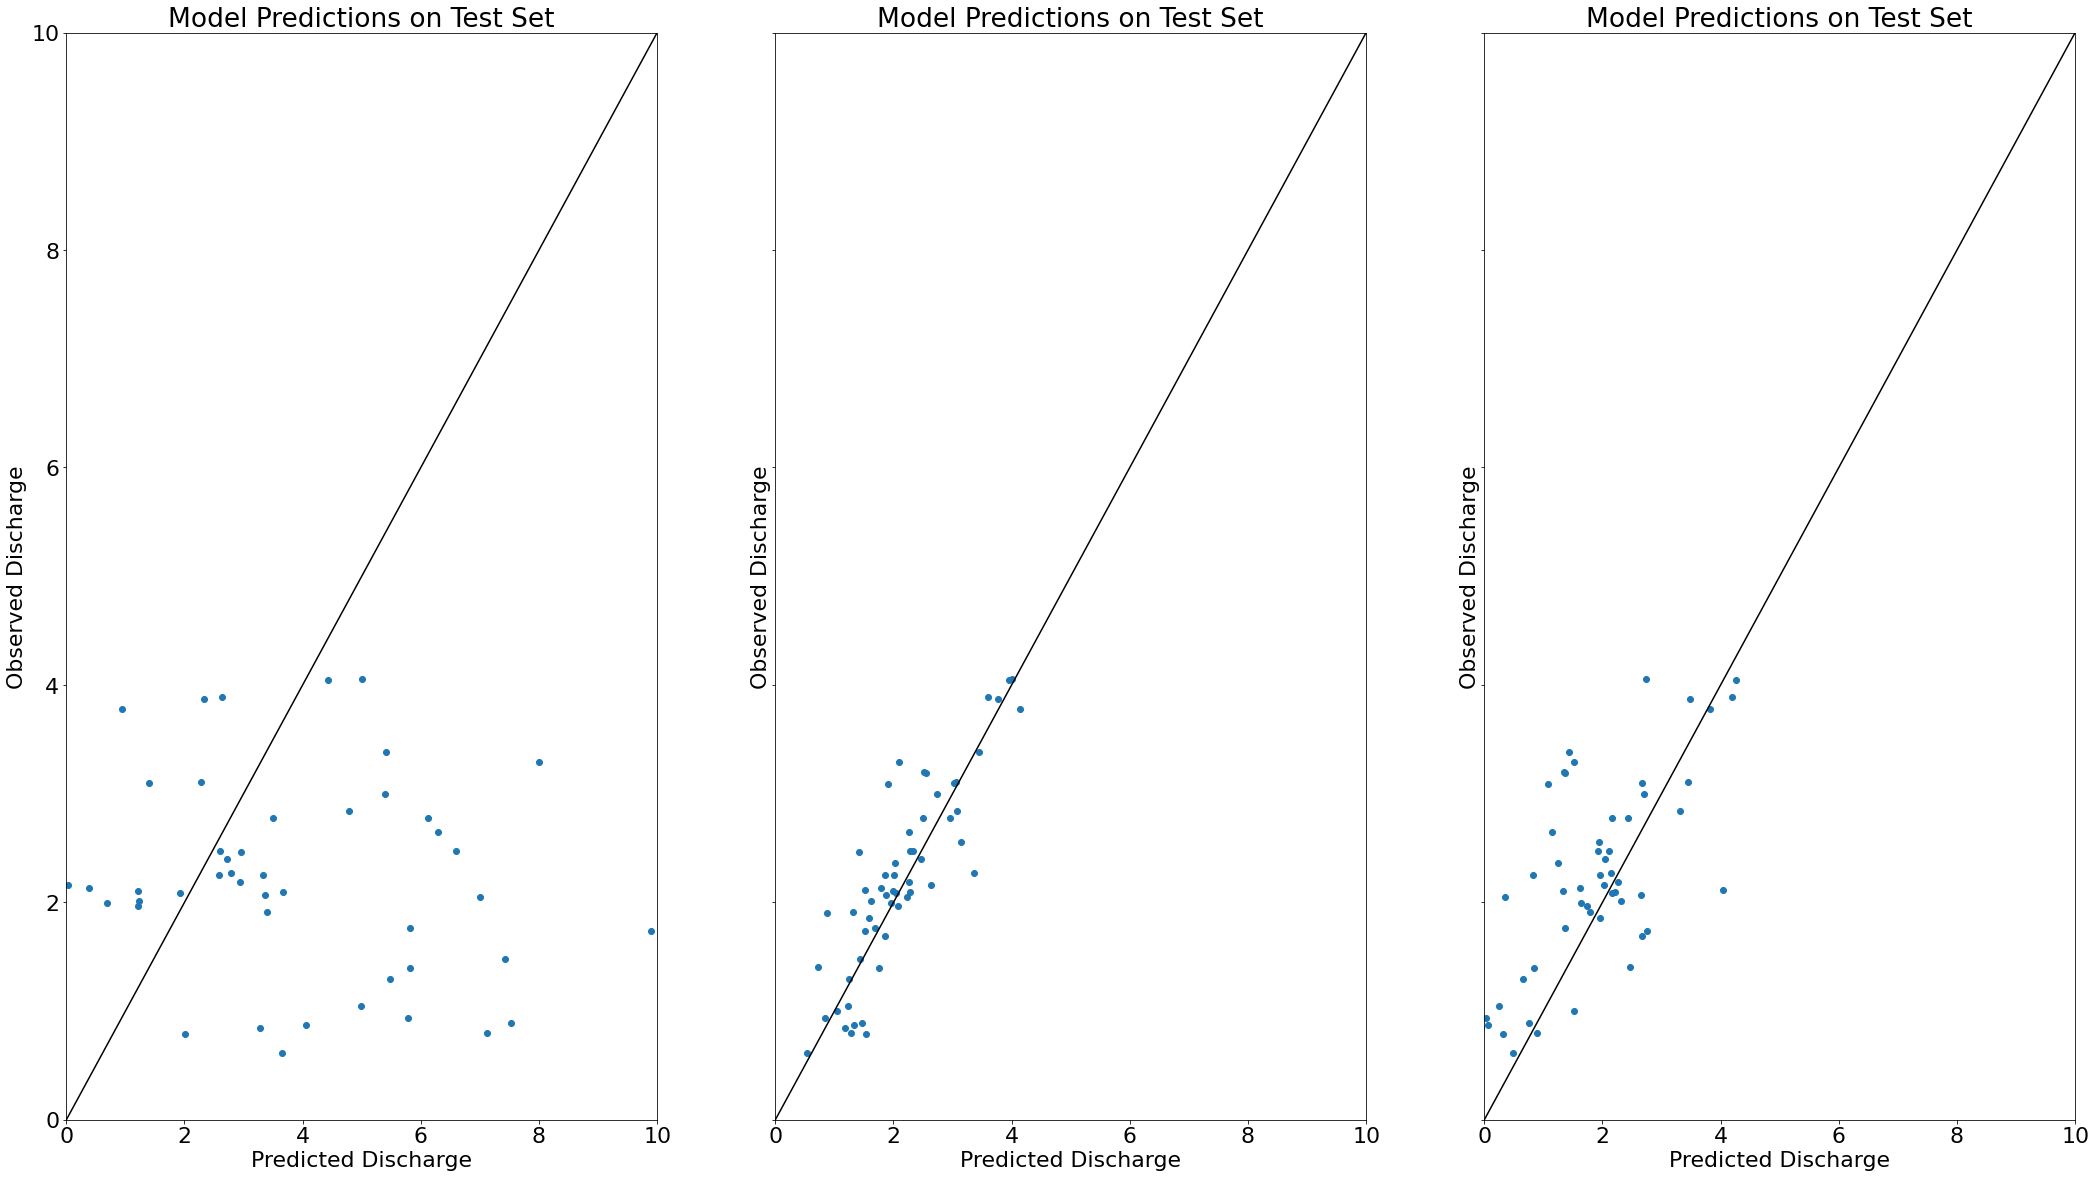

In [73]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=False,
                                    figsize=(36,20))
fig.patch.set_facecolor('white')
ax0.set_title('Model Predictions on Test Set', )
ax0.scatter(predictions_linear, test_set)
ax0.set_ylim([0,10])
ax0.set_xlim([0,10])
ax0.plot([0,10],[0,10], c='black')
ax0.set_xlabel('Predicted Discharge')
ax0.set_ylabel('Observed Discharge')


ax1.set_title('Model Predictions on Test Set', )
ax1.scatter(predictions_lstm, test_set)
ax1.set_ylim([0,10])
ax1.set_xlim([0,10])
ax1.plot([0,10],[0,10], c='black')
ax1.set_xlabel('Predicted Discharge')
ax1.set_ylabel('Observed Discharge')

ax2.set_title('Model Predictions on Test Set', )
ax2.scatter(predictions_dnn, test_set)
ax2.set_ylim([0,10])
ax2.set_xlim([0,10])
ax2.plot([0,10],[0,10], c='black')
ax2.set_xlabel('Predicted Discharge')
ax2.set_ylabel('Observed Discharge')